In [1]:
# Artificial Neural Network

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

In [2]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])

labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

C:\Users\nakhon\Anaconda3\envs\t81_558_deep_learning\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\nakhon\Anaconda3\envs\t81_558_deep_learning\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [3]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [4]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Using TensorFlow backend.


Epoch 1/100
8000/8000 [==============================] - 1s 80us/step - loss: 0.4796 - acc: 0.7957
Epoch 2/100
8000/8000 [==============================] - 0s 57us/step - loss: 0.4142 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 0s 57us/step - loss: 0.4041 - acc: 0.8167
Epoch 4/100
8000/8000 [==============================] - 0s 62us/step - loss: 0.3943 - acc: 0.8294
Epoch 5/100
8000/8000 [==============================] - 0s 61us/step - loss: 0.3862 - acc: 0.8304
Epoch 6/100
8000/8000 [==============================] - 1s 66us/step - loss: 0.3805 - acc: 0.8356
Epoch 7/100
8000/8000 [==============================] - 0s 59us/step - loss: 0.3754 - acc: 0.8451
Epoch 8/100
8000/8000 [==============================] - 0s 58us/step - loss: 0.3720 - acc: 0.8469
Epoch 9/100
8000/8000 [==============================] - 0s 61us/step - loss: 0.3695 - acc: 0.8504
Epoch 10/100
8000/8000 [==============================] - 0s 59us/step - loss: 0.3676 - acc: 0.8512
Epoch 11/

8000/8000 [==============================] - 1s 65us/step - loss: 0.3468 - acc: 0.8596
Epoch 83/100
8000/8000 [==============================] - 1s 65us/step - loss: 0.3463 - acc: 0.8594: 0s - loss: 0.3497 - acc: 0.
Epoch 84/100
8000/8000 [==============================] - 1s 63us/step - loss: 0.3459 - acc: 0.8589
Epoch 85/100
8000/8000 [==============================] - 0s 60us/step - loss: 0.3458 - acc: 0.8576
Epoch 86/100
8000/8000 [==============================] - 1s 65us/step - loss: 0.3459 - acc: 0.8607
Epoch 87/100
8000/8000 [==============================] - 0s 60us/step - loss: 0.3452 - acc: 0.8591
Epoch 88/100
8000/8000 [==============================] - 0s 62us/step - loss: 0.3455 - acc: 0.8602
Epoch 89/100
8000/8000 [==============================] - 1s 65us/step - loss: 0.3454 - acc: 0.8594
Epoch 90/100
8000/8000 [==============================] - 0s 60us/step - loss: 0.3456 - acc: 0.8587
Epoch 91/100
8000/8000 [==============================] - 0s 61us/step - loss: 0.344

In [6]:
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Confusion matrix, without normalization
[[1532   63]
 [ 207  198]]


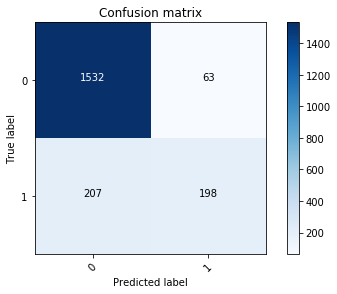

In [7]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Source: http://scikit-learn.org/stable/auto_examples/model_selection/
#         plot_confusion_matrix.html#confusion-matrix


# y_test = np.array([1, 1, 0, 1])
# y_train = np.array([0, 0, 1, 1])

# y_test_pred = np.array([1, 1, 0, 1])  # from classifier_logistic.predict(x_test)
# y_train_pred = np.array([0, 1, 0, 1]) # from classifier_logistic.predict(x_train)

# y_true = np.concatenate((y_train, y_test))
# y_pred = np.concatenate((y_train_pred, y_test_pred))

def plot_confusion_matrix(cm, classes,  normalize=False,  title='Confusion matrix',  cmap=plt.cm.Blues):
            """
            This function prints and plots the confusion matrix.
            Normalization can be applied by setting `normalize=True`.
            """
            if normalize:
                cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
                print("Normalized confusion matrix")
            else:
                print('Confusion matrix, without normalization')

            print(cm)

            plt.imshow(cm, interpolation='nearest', cmap=cmap)
            plt.title(title)
            plt.colorbar()
            tick_marks = np.arange(len(classes))
            plt.xticks(tick_marks, classes, rotation=45)
            plt.yticks(tick_marks, classes)

            fmt = '.2f' if normalize else 'd'
            thresh = cm.max() / 2.
            for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
                plt.text(j, i, format(cm[i, j], fmt),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")

            plt.tight_layout()
            plt.ylabel('True label')
            plt.xlabel('Predicted label')

# cm = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cm, classes=[0, 1], title='Confusion matrix')